1. 필요 패키지 불러오기

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.utils import to_categorical

2. 데이터 전처리 연습

- Red soil (적토)
- Cotton crop (목화 재배지)
- Vegetable crop (채소 재배지)
- Grey soil (회색 토양)
- Damp grey soil (습한 회색 토양)
- Soil with vegetation stubble (식생 잔재가 있는 토양)

In [4]:
df = pd.read_csv("satimage.csv")

#데이터프레임인 df에서 컬럼 선택: df[ [ 컬럼이름을 여기에  ]    ]
X = df.drop('y', axis=1) #해당 컬럼 3개를 갖는 데이터프레임
y_orig = df.y #해당 컬럼을 갖는 데이터프레임

#One hot encoding
y = to_categorical(y_orig) #One hot encoding 시키기

#scaling
X = MinMaxScaler().fit_transform(X) #스케일링 시키기

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

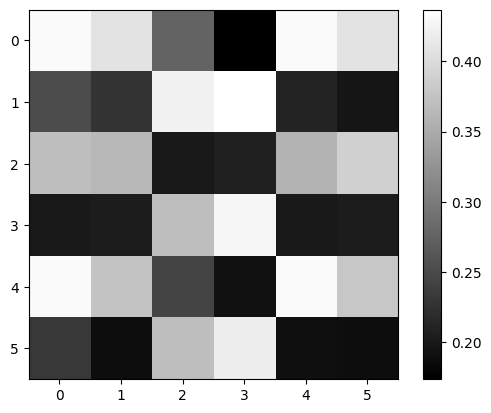

In [18]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2].reshape(6,6), cmap="gray")
plt.colorbar()
plt.show()

3. 모델링 및 적합

In [8]:
#DNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#Hidden layer 구성하기
model = Sequential()
model.add(Dense(3, activation = 'relu', input_shape = (36, ))) #첫번째 은닉층, 3개입력->2개 은닉층 노드, Desnse: 일반적인 은닉층, Fully connected hidden layer
model.add(Dense(6, activation = 'relu')) #두번째 은닉층, 2개입력->6개 은닉층 노드, Desnse: 일반적인 은닉층, Fully connected hidden layer
model.add(Dense(6, activation = 'softmax')) #Desnse: 마지막 은닉층, Fully connected hidden layer, 분류의 경우 softmax

#모형 컴파일
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc']) #분류모형은 이대로 사용하기
model.summary()

#모형 학습 및 가중치 확인
model.fit(X_train,y_train,epochs = 20)  #epoch수를 조정


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 3)              │           111 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.2149 - loss: 1.7807
Epoch 2/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - acc: 0.2518 - loss: 1.6885
Epoch 3/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.2941 - loss: 1.5420
Epoch 4/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.3384 - loss: 1.4796
Epoch 5/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.4515 - loss: 1.4027
Epoch 6/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5375 - loss: 1.3347
Epoch 7/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5600 - loss: 1.1876
Epoch 8/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5472 - loss: 1.1172
Epoch 9/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5439 - loss: 1.0718
Epoch 10/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5507 - loss: 1.0301
Epoch 11/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5536 - loss: 1.0102
Epoch 12/20
161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - acc: 0.5570 - loss: 0.9782
Epoch 13/20
161/161 ━━━━━

5. 결과확인 및 평가

In [10]:
predicted = model.predict( X_test)
predicted2 = np.argmax(predicted, axis=-1)
actual = np.argmax(y_test, axis=-1)

print("Accuracy:", np.mean(predicted2 == actual))


41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.585081585081585


In [11]:
model.summary()
print( model.get_weights() ) #가중치 확인


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 3)              │           111 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 6)              │            24 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 6)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 533 (2.09 KB)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 356 (1.39 KB)

[array([[-3.81961763e-01, -2.86355376e-01,  1.32257178e-01],
       [-1.95228130e-01, -3.72112989e-02, -2.50250939e-02],
       [ 1.66401684e-01, -3.57434511e-01, -2.96688557e-01],
       [ 2.45073825e-01, -7.57151544e-02, -2.05293536e-01],
       [-3.22600871e-01,  2.36548215e-01,  6.80742115e-02],
       [-4.15451437e-01, -5.71821928e-02, -4.60343510e-02],
       [ 2.60835111e-01, -4.10223007e-03,  3.02991003e-01],
       [ 8.81974399e-01, -1.96132407e-01, -1.07026443e-01],
       [-5.10748208e-01, -1.57692790e-01,  3.44978392e-01],
       [-3.52744669e-01, -3.57041359e-01,  3.24248411e-02],
       [ 3.60608399e-02, -2.04747617e-01,  7.80217424e-02],
       [ 9.41415787e-01,  1.17648333e-01, -1.57777905e-01],
       [-1.91903353e-01,  2.17814356e-01, -1.70137346e-01],
       [-4.53140944e-01, -3.45752090e-01,  3.11682999e-01],
       [ 4.25899029e-01,  2.92867512e-01,  3.27016443e-01],
       [ 4.91547704e-01,  3.06150943e-01, -3.90564829e-01],
       [-6.97976947e-01, -1.57531500e-0

In [12]:
#분류 보고서
from sklearn.metrics import classification_report, confusion_matrix
print('\n', classification_report(actual, predicted2))


               precision    recall  f1-score   support

           0       0.72      0.99      0.84       343
           1       0.93      0.90      0.92       145
           2       0.00      0.00      0.00       259
           3       0.00      0.00      0.00       115
           4       0.00      0.00      0.00       140
           5       0.42      0.99      0.59       285

    accuracy                           0.59      1287
   macro avg       0.34      0.48      0.39      1287
weighted avg       0.39      0.59      0.46      1287



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Cifar-10 데이터셋으로 분류모형 생성
- MLP 생성
- 실제 사진에 적용
- test-car.jpg를 업로드해서 분류
- 구글 등에서 자동차, 배, 비행기 사진을 jpg로 다운로드하셔서 적용

In [19]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [20]:
X_test.shape

(10000, 32, 32, 3)

In [21]:
y_train.shape

(50000, 1)

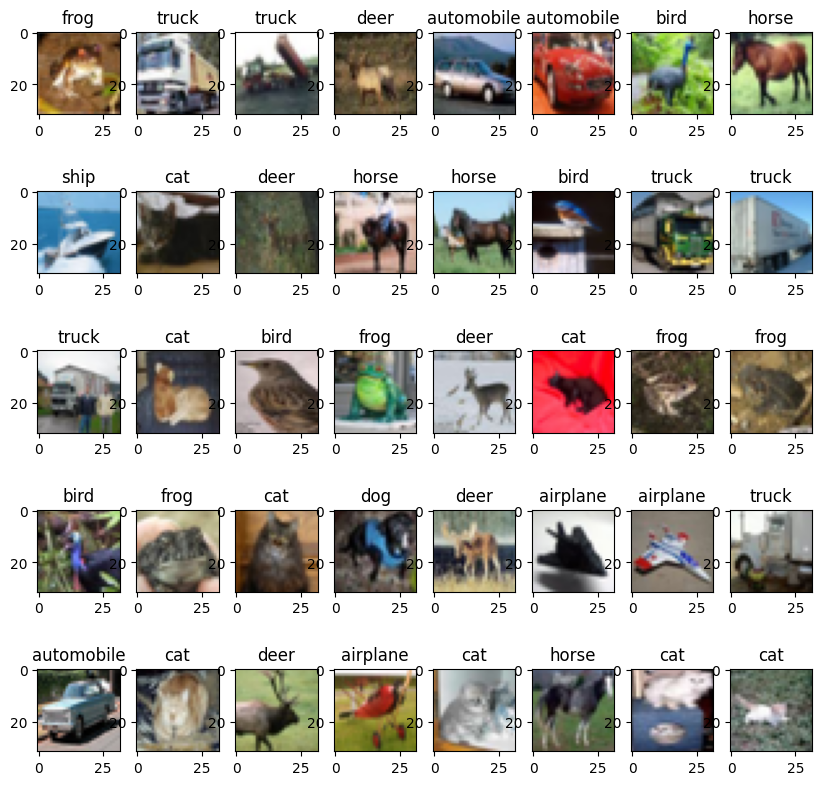

In [22]:
import matplotlib.pyplot as plt
from PIL import Image

#합성, rotate, 뒤집기, resize

plt.figure(figsize=(10, 10))
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(0, 40):
    im = Image.fromarray(X_train[i])
    plt.subplot(5, 8, i + 1)
    plt.title(labels[y_train[i][0]])
    plt.tick_params(labelbottom="off",bottom="off") # x축 제거
    plt.tick_params(labelleft="off",left="off") # y축 제거
    plt.imshow(im)

plt.show()

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
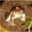

In [23]:
X_train[0]

In [24]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout

num_classes = 10
im_rows = 32
im_cols = 32
im_size = im_rows * im_cols * 3 #3072

# 데이터 읽어 들이기 --- (*1)
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# 데이터를 2차원 배열로 변환하기 --- (*2)
X_train = X_train.reshape(-1, im_size).astype('float32') / 255
X_test = X_test.reshape(-1, im_size).astype('float32') / 255


In [25]:
X_train[0]

array([0.23137255, 0.24313726, 0.24705882, ..., 0.48235294, 0.36078432,
       0.28235295], dtype=float32)

In [26]:
# 타겟변수를 One-hot 형식으로 변환하기
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

y_train.shape

(50000, 10)

In [27]:
# 모델 정의하기 --- (*3)
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(im_size,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# 모델 컴파일하기 --- (*4)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

# 학습 실행하기 --- (*5)
hist = model.fit(X_train, y_train,
    batch_size=32, epochs=5,
    verbose=1,
    validation_split=0.1)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 49ms/step - accuracy: 0.2499 - loss: 2.0305 - val_accuracy: 0.3546 - val_loss: 1.7906
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 44ms/step - accuracy: 0.3713 - loss: 1.7442 - val_accuracy: 0.3874 - val_loss: 1.6976
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.4075 - loss: 1.6494 - val_accuracy: 0.4218 - val_loss: 1.6183
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 61s 43ms/step - accuracy: 0.4300 - loss: 1.5753 - val_accuracy: 0.4358 - val_loss: 1.5768
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.4523 - loss: 1.5289 - val_accuracy: 0.4572 - val_loss: 1.5090


In [28]:
# 모델 평가하기 --- (*6)
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률=', score[1], 'loss=', score[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4692 - loss: 1.4854
정답률= 0.46560001373291016 loss= 1.497630000114441


In [29]:
hist.history['accuracy']

[0.3037555515766144,
 0.37797778844833374,
 0.41164445877075195,
 0.43417778611183167,
 0.45028889179229736]

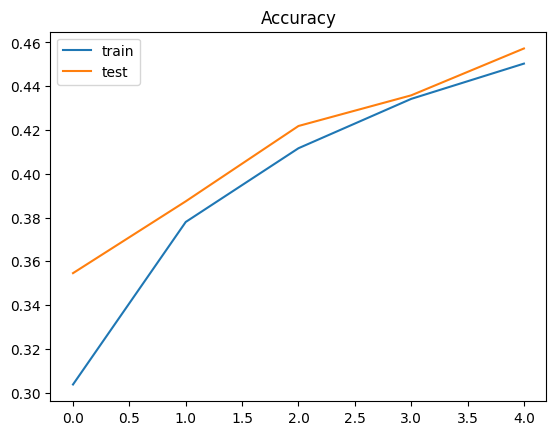

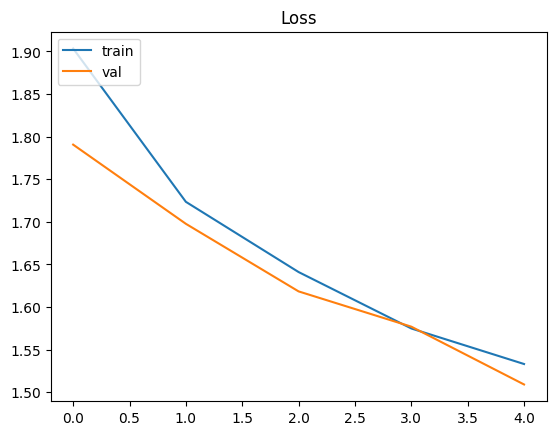

In [30]:
# 학습 상태를 그래프로 그리기 --- (*7)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 모형 저장: 가중치의 저장

In [31]:
model.save_weights('cifar10.weights.h5')

In [32]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 1024)           │     3,146,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,238,368 (42.87 MB)

 Trainable params: 3,746,122 (14.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,492,246 (28.58 MB)

# 실제 사진에의 적용

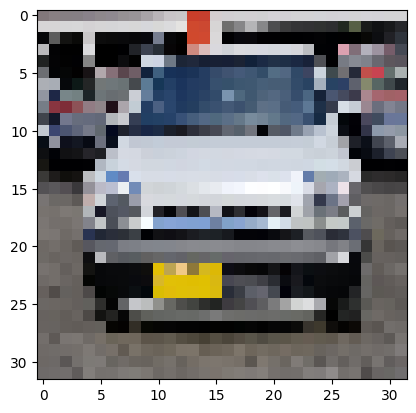

In [33]:
import cv2
import numpy as np
# 레이블 정보
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# 모델 데이터 읽어 들이기
model.load_weights('cifar10.weights.h5')

# OpenCV를 사용해서 이.weight읽어 들이기
im = cv2.imread('test-car.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #test-car.jpg 업로드 필요
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

In [34]:
# MLP로 학습한 이미지 데이터에 형태 맞추기
im = im.reshape(im_size).astype('float32') / 255
# 예측하기
r = model.predict(np.array([im]), batch_size=32,verbose=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


In [35]:
res = r[0]
# 결과 출력하기
for i, acc in enumerate(res):
    print(labels[i], "=", int(acc * 100))
print("---")
print("예측한 결과=", labels[res.argmax()])

airplane = 1
automobile = 74
bird = 0
cat = 0
deer = 0
dog = 0
frog = 0
horse = 1
ship = 2
truck = 20
---
예측한 결과= automobile


In [36]:
import numpy as np
print(np.array([1, 0, 9, 3]).argmax()) # 결과 → 2
print(np.array([1, 3, 2, 9]).argmax()) # 결과 → 3
print(np.array([9, 0, 2, 3]).argmax()) # 결과 → 0

2
3
0
